# Book Analysis: Harry Potter and the Philosopher's Stone

### Project Overview 
* Text mining of Harry Potter book. 
* Functions to tokenize, manipulate text and build plots.
* Sentiment analysis. 

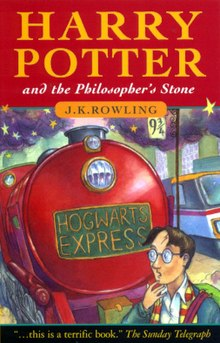

In [44]:
from IPython import display
display.Image("./images/HP1.jpg")

In [3]:
# Book
# Open the book and read it
text = open('HarryPotter1.txt')
text = text.read()

In [4]:
# Modules
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tag import pos_tag
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

## Tokenization

Splitted an entire text into small units, known as tokens. Created a list of all the words, sentences, paragraphs and chapters in the book.  

## Text mining

Explored the text to discover repetitive patterns that explain the behavior of the text. Used Frequency Distribution function from NLTK. Created a ranked list of words. Eliminated the common words (stop words). Selected proper nouns and ranked them. 

In [5]:
# Tokenization and text cleaning
# Tokenize text: splitting an entire text into small units, known as tokens

# Function to remove punctuation
def remove_punctuation(st,exception=''):
    'Remove punctuation.'
    punctuation = '''!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'''
    punctuation = punctuation.replace(exception,'')
    for c in st:
        if c in punctuation:
            st = st.replace(c,'')
    return st

# Function that takes in a book and returns a list of words
def create_word_list(st):
    'From a text, it returns a list of words.'
    st  = remove_punctuation(st)
    return word_tokenize(st)

# Function that takes in a book and returns a list of sentences
def create_sentence_list(st):
    'From a text, it returns a list of sentences.'
    st = remove_punctuation(st,'.')
    return sent_tokenize(st)

# Function that takes in a book and returns a list of paragraphs
def create_paragraph_list(st):
    'From a text, it returns a list of paragraphs.'
    ans = remove_punctuation(st)
    return ans.split('\n\n')

# Function that takes in a book and returns a list of chapters
def create_chapter_list(st):
    '''From a text, it returns a list of chapters if our 
    book include the word chapter'''
    ans = remove_punctuation(st,'-')
    ans = ans.replace('-',' ')
    return ans.split('CHAPTER')

In [6]:
# Create a list of all the words in the book
words = create_word_list(text)
# Create a list of all the sentences in the book
sentences = create_sentence_list(text)
# Create a list of all the sentences in the book
paragraphs = create_paragraph_list(text)
# Create a list of all the chapters in the book
chapters = create_chapter_list(text)

In [9]:
# Create a frequency dictionary for all the words in Harry Potter
# Use Frequency Distribution function from NLTK
freq_distribution = FreqDist(words)
# Convert into a dictionary
freq_d = dict(freq_distribution)
#print(freq_d)

In [10]:
# Create a ranked list of words
# Use sorted() method
ranked_list = sorted(freq_d, key=freq_d.get, reverse = True)

# Remove anormalities observed
ranked_list.remove('Well')
ranked_list.remove('Oh')

In [11]:
# Stop words
# Eliminate the common words in the language
stop_words = set(stopwords.words("english"))
words = set(words)

In [12]:
# Proper nouns
# Select proper nouns and rank them
# Ranking of all proper nouns
tagged_text = pos_tag(text.split())
proper_nouns = [word for word,pos in tagged_text if pos == 'NNP']

filtered_d = {}
for word in ranked_list:
    if word in proper_nouns and word.istitle() and word.lower() not in stop_words:
        filtered_d[word] = freq_d[word]
        #print(word,':',freq_d[word])
        
# Remove any anomalies observed
del filtered_d['Professor']
del filtered_d['Uncle']

In [13]:
# DataFrame of proper nouns
# Put the dictionary into a DataFrame
df_proper = pd.DataFrame.from_dict(filtered_d, orient = 'index').iloc[0:10]
#print(df_proper)

## Most mentioned Characters

The ten most mentioned characters of Harry Potter and the Philosopher's stone were analyzed.

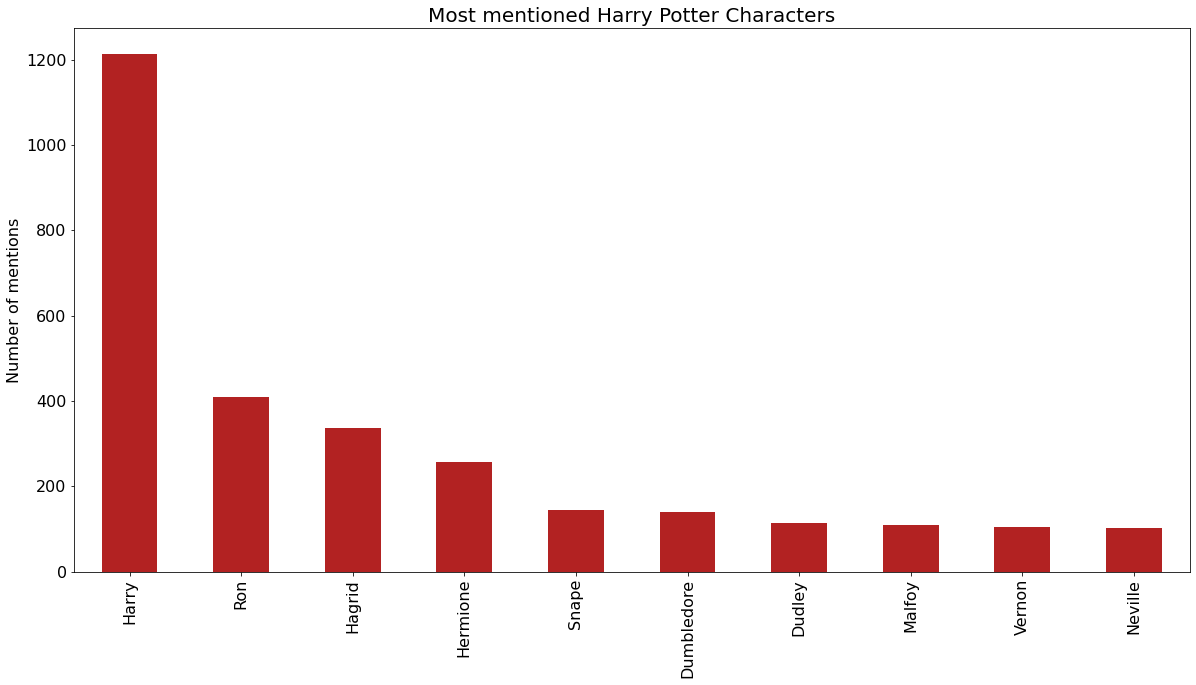

In [14]:
# Barplot
df_proper.plot.bar(figsize = (20,10), fontsize = 16, legend = False, color='firebrick')
plt.title('Most mentioned Harry Potter Characters',fontsize = 20)
plt.ylabel("Number of mentions", fontsize = 16)
plt.show()

As expected, the name Harry was the most mentioned one, a total of 1213 times. It was followed by Ron (410 times), Hagrid (336 times) and Hermiones (257 times).

# Sentiment Analysis

Calculated sentiment polarity (textblob). The polarity for an element defines the orientation of the expressed sentiment, i.e., it determines if the text expresses the positive, negative or neutral sentiment of the user about the entity in consideration.

## Chapters

A sentiment analysis was applied on the book chapters.

In [15]:
# Calculate a sentiment level (polarity) value for each chapter
# Create a dictionary where chapter num is key and sentiment level is the value
chapter_sentiment = {}
chapter = 0 # change this to make chapters align

for c in chapters:
    chapter_sentiment[str(chapter)] = TextBlob(c).polarity
    chapter+=1

In [16]:
# Put the dictionary into a DataFrame
df_sent = pd.DataFrame.from_dict(chapter_sentiment, orient = 'index').iloc[1:18]
#print(df_sent)

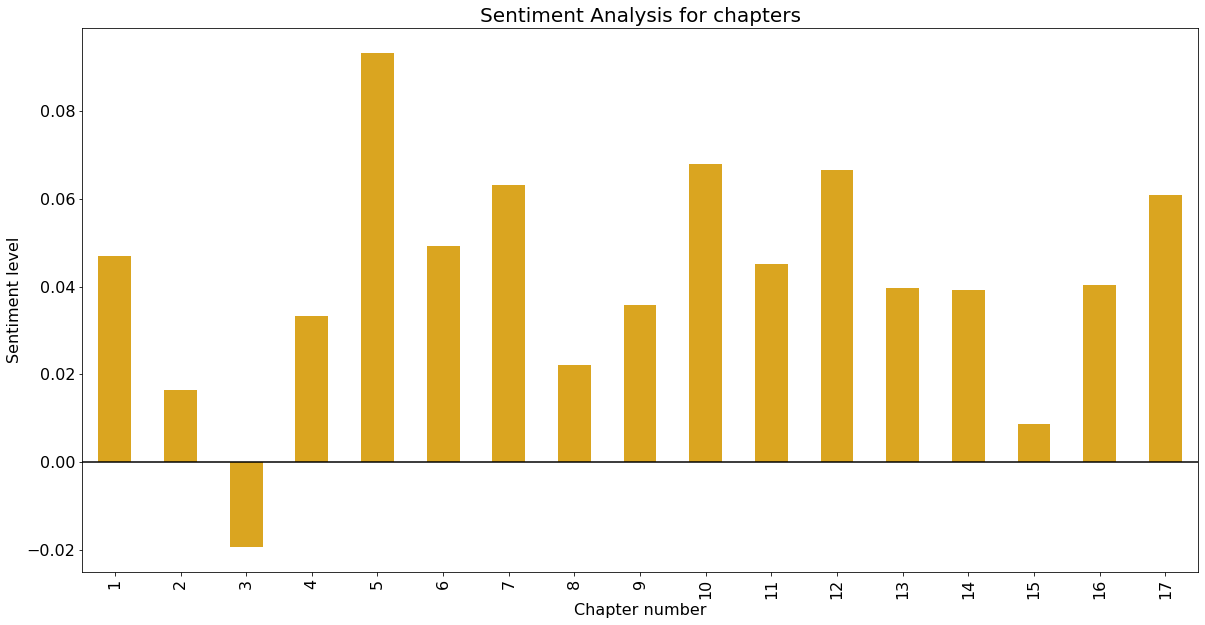

In [27]:
# Barplot
df_sent.plot.bar(figsize = (20,10), fontsize = 16, legend = False, color='goldenrod')
plt.axhline(y=0, color='black', linestyle='-')
plt.title('Sentiment Analysis for chapters',fontsize = 20)
plt.xlabel("Chapter number", fontsize = 16)
plt.ylabel("Sentiment level", fontsize = 16)
plt.show()

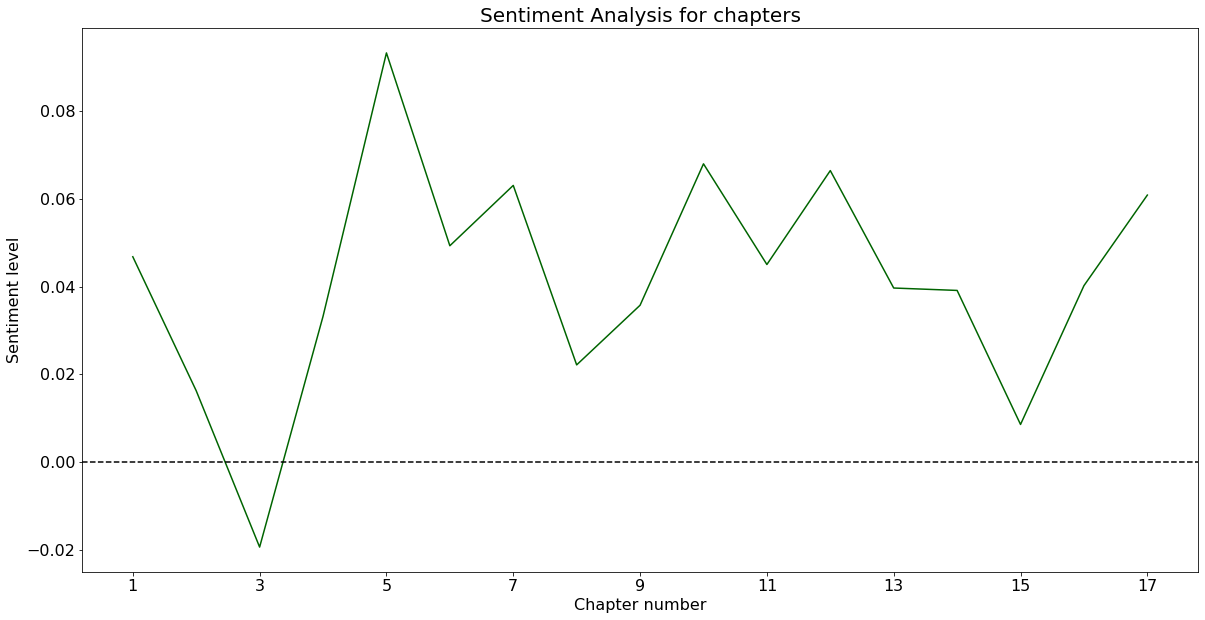

In [26]:
#Lineplot
df_sent.plot.line(figsize = (20,10), fontsize = 16, legend = False, color='darkgreen')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Sentiment Analysis for chapters',fontsize = 20)
plt.xlabel("Chapter number", fontsize = 16)
plt.ylabel("Sentiment level", fontsize = 16)
plt.show()

Numbers > 0 mean positive sentiment levels and numbers < 0, negative sentiment level.
Chapter 3 was the only chapter with a negative sentiment level. In chapter 3, punished for the boa constrictor incident, Harry was locked alone in his cupboard until summer. In this chapter, Uncle Vernon prevented Harry from receiving Hogwarts' letter in many ways, even taking the family to an island on a stormy night, setting the scene in an atmosphere of mystery and terror.

## Protagonist: Harry Potter

Each paragraph/sentence receives a sentiment level. The candidate is then given the sentiment score based on their average appearance in positive and negative paragraphs/sentences.

The sentiment level for Harry Potter was calculated based on his appareance on sentences and paragraphs.

In [21]:
# Function that takes in a name and returns a positive/negative score for sentiment level (polarity)
def protagonist_score(candidate,paragraph_list):
    '''Takes a name (candidate) and a list of paragraphs/sentences 
    and returns a positive/negative score for sentiment level (polarity)'''
    score = 0
    for entity in paragraph_list:
        blob = TextBlob(entity)
        if candidate in entity:
            score += blob.polarity
    return score

In [22]:
print('Sentiment level for Harry Potter based on sentences:', round(protagonist_score('Harry',sentences),2))
print('Sentiment level for Harry Potter based on paragraphs:', round(protagonist_score('Harry',paragraphs),2))

Sentiment level for Harry Potter based on sentences: 39.47
Sentiment level for Harry Potter based on paragraphs: 34.02


Harry Potter received a high sentiment level showing his positivity along the book. The sentiment levels for either sentences or paragraphs showed similar results, demonstating that both entities of the book are quite good for the estimations.

## Hogwarts houses

Sentiment level for the four Hogwarts houses based on appareances in senteces was analyzed.

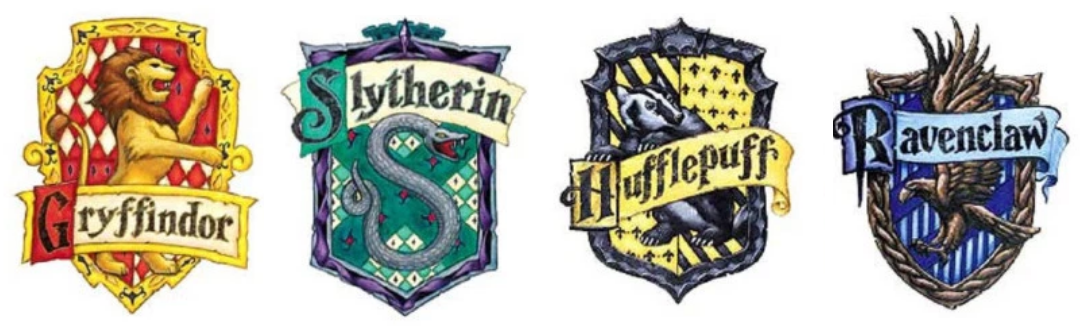

In [41]:
display.Image("./images/Houses.png")

In [23]:
# Dictionary of houses and their sentiment level:
houses = ['Gryffindor', 'Slytherin', 'Hufflepuff', 'Ravenclaw']
houses_sent = {}
for house in houses:
    houses_sent[house] = protagonist_score(house,sentences)

# Put the dictionary into a DataFrame
df_houses = pd.DataFrame.from_dict(houses_sent, orient = 'index')

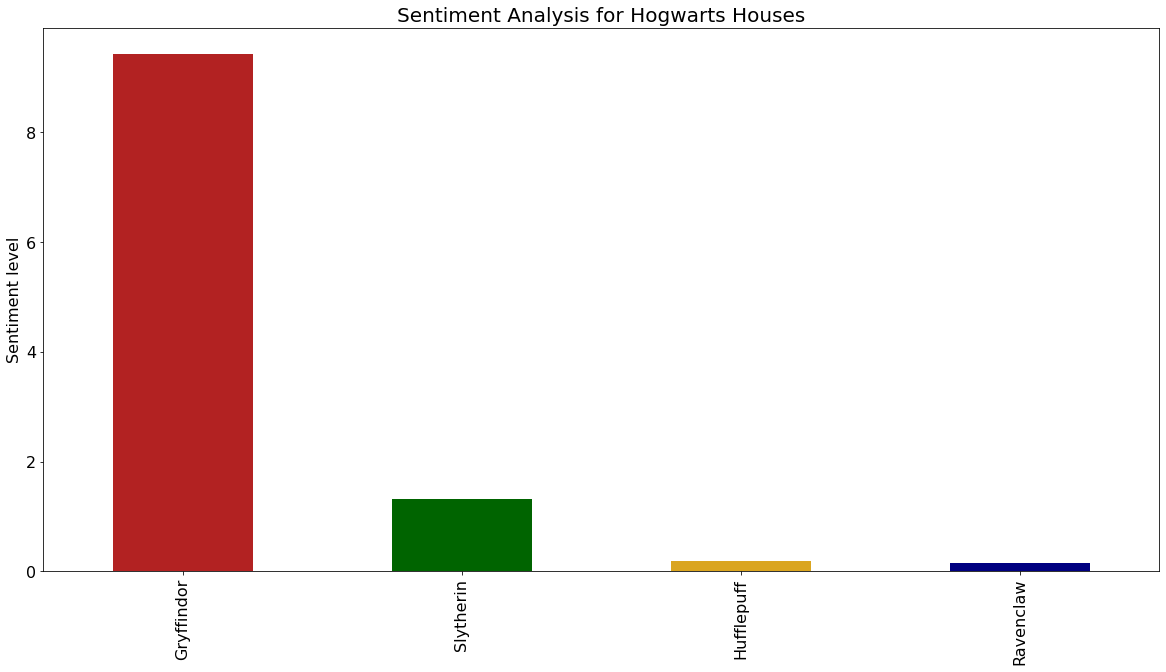

In [25]:
# Barplot
df_houses.plot.bar(figsize = (20,10), fontsize = 16, legend = False, 
                   color=('firebrick', 'darkgreen', 'goldenrod', 'navy'))
plt.title('Sentiment Analysis for Hogwarts Houses',fontsize = 20)
plt.ylabel("Sentiment level", fontsize = 16)
plt.show()

For Hogwarts houses, Gryffindor got the highest sentiment level. Unexpectedly, Ravenclaw and Hufflepuff got lower sentiment levels than Slytherin. It was probably due to lower mentions in general along the book.

## Key characters

Sentiment level for the key characters based on appareances in paragraphs.

In [28]:
# List of key characters:
protagonists = list(filtered_d.keys())
protagonists10 = protagonists[0:10]

# Dictionary of key characters and their sentiment level:
protagonist_index = {}
for candidate in protagonists10:
    protagonist_index[candidate] = protagonist_score(candidate,paragraphs)
    
# Put the dictionary into a DataFrame
df_prot = pd.DataFrame.from_dict(protagonist_index, orient = 'index')

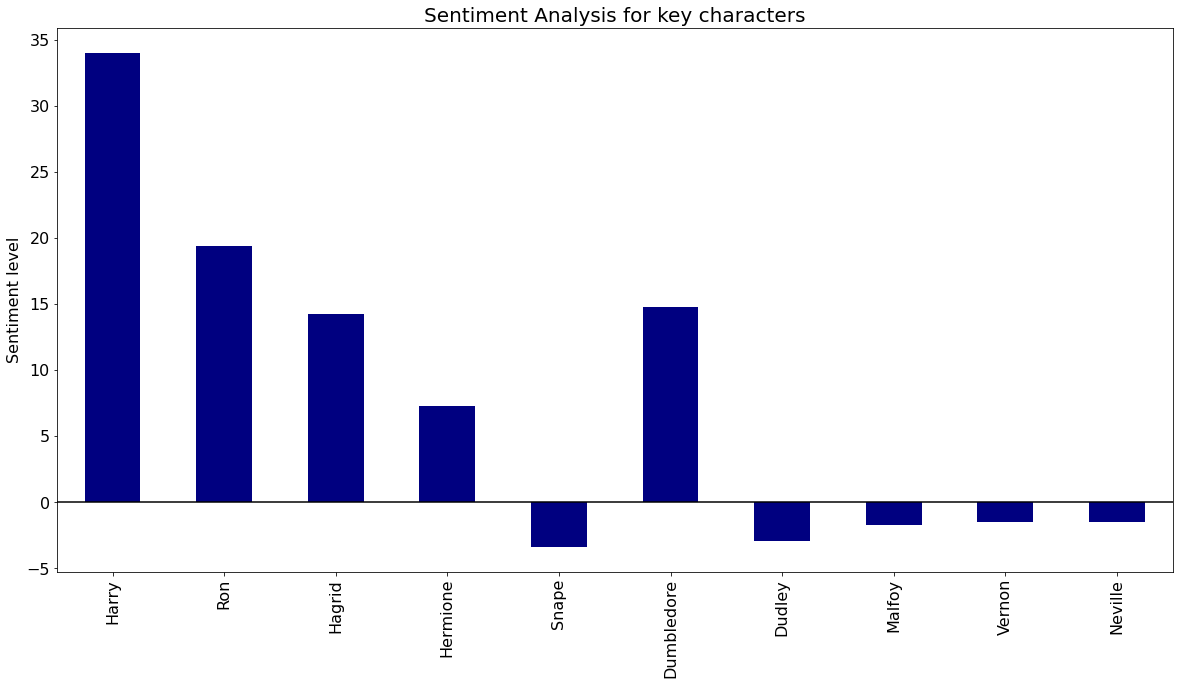

In [29]:
# Barplot
df_prot.plot.bar(figsize = (20,10), fontsize = 16, legend = False, color='navy')
plt.axhline(y=0, color='black', linestyle='-')
plt.title('Sentiment Analysis for key characters',fontsize = 20)
plt.ylabel("Sentiment level", fontsize = 16)
plt.show()

## Character's sentiment journey across the book

The sentiment analysis was applied for a specific character. The book was splitted into a selected number of sections to display a chronological counter with its corresponding sentiment level. The sentiment level for each section of the journey across the book was also calculated cumulatively.

In [35]:
protag = "Snape"

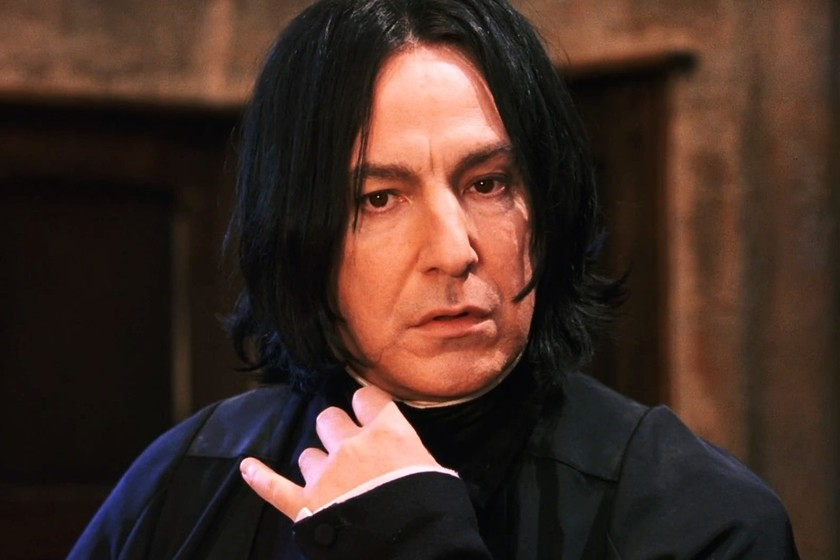

In [42]:
display.Image("./images/Snape.jpg")

In [33]:
# Functions
def character_sentences(character):
    "Returns a list of sentences containing the character's name."
    character_sents = []
    for sent in sentences:
        if character in sent:
            character_sents.append(sent)
    return character_sents

def character_journey(character, sample_size):
    '''Takes in a character and a sample size of choice 
    and returns a dictinary with a chronological counter and polarity.'''
    sentences = character_sentences(character)
    character_journey = {}
    counter = 0
    upper_slice = sample_size
    lower_slice = 0
    while upper_slice < len(sentences):
        sample = sentences[lower_slice : upper_slice]
        sample = ' '.join(sample)
        character_journey[str(counter)] = TextBlob(sample).polarity
        counter += 1
        upper_slice += sample_size
        lower_slice += sample_size
    return character_journey

def character_journey_cumulative(character, sample_size):
    '''Takes in a character and a sample size of choice 
    and returns a dictinary with a chronological counter and cumulative polarity.'''
    sentences = character_sentences(character)
    character_journey = {}
    counter = 0
    upper_slice = sample_size
    lower_slice = 0
    overall_polarity = 0
    while upper_slice < len(sentences):
        sample = sentences[lower_slice : upper_slice]
        sample = ' '.join(sample)
        overall_polarity += TextBlob(sample).polarity
        character_journey[str(counter)] = overall_polarity
        counter += 1
        upper_slice += sample_size
        lower_slice += sample_size
    return character_journey

In [34]:
# Number of sentences of protagonist
protag_sents = character_sentences(protag)
print('Number of sentences where', protag, 'appears:', len(protag_sents))

Number of sentences where Snape appears: 157


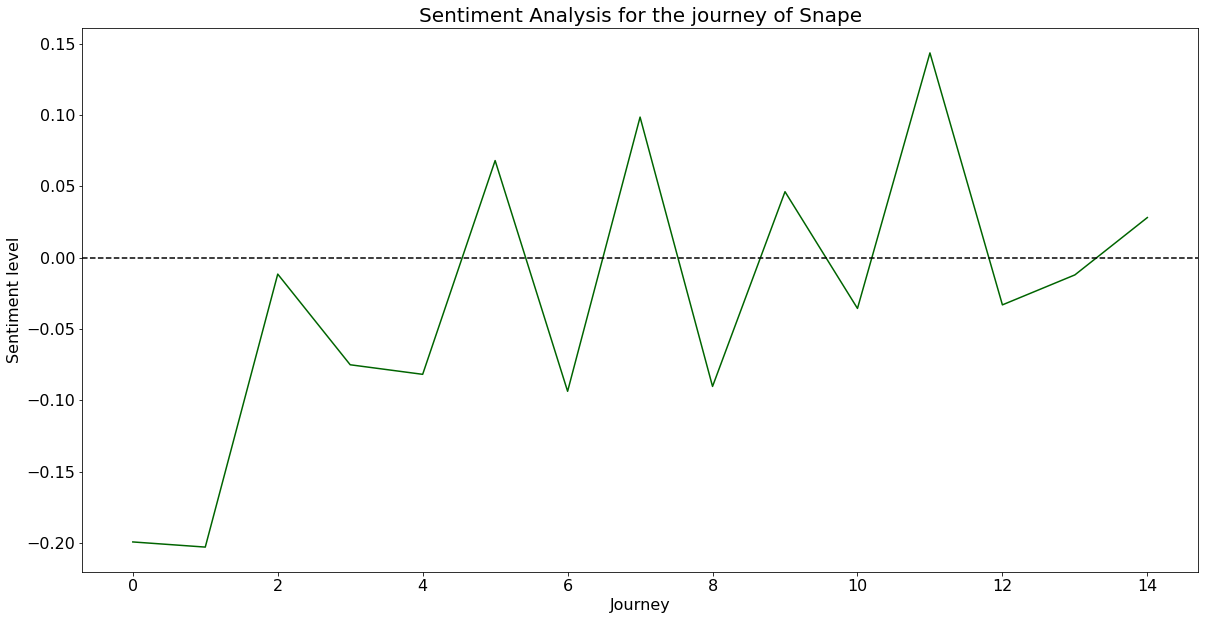

In [38]:
# Protagonist Journey
character_j = character_journey(protag,10)
df_j = pd.DataFrame.from_dict(character_j, orient = 'index')

#Lineplot
df_j.plot.line(figsize = (20,10), fontsize = 16, legend = False, color='darkgreen')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Sentiment Analysis for the journey of ' + protag ,fontsize = 20)
plt.xlabel("Journey", fontsize = 16)
plt.ylabel("Sentiment level", fontsize = 16)
plt.show()

Snape's sentiment journey was almost around zero across the book.

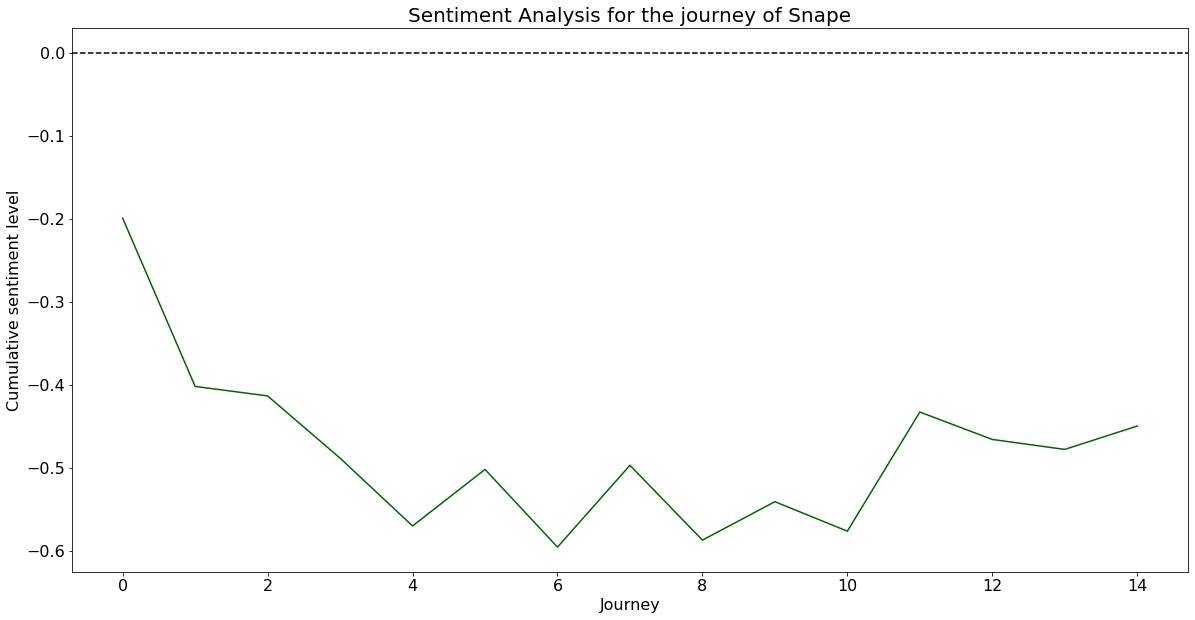

In [39]:
# Protagonist Journey cumulative
character_jc = character_journey_cumulative(protag,10)
df_jc = pd.DataFrame.from_dict(character_jc, orient = 'index')

#Lineplot
df_jc.plot.line(figsize = (20,10), fontsize = 16, legend = False, color='darkgreen')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Sentiment Analysis for the journey of ' + protag ,fontsize = 20)
plt.xlabel("Journey", fontsize = 16)
plt.ylabel("Cumulative sentiment level", fontsize = 16)
plt.show()

But cumulatively, Snape had negative sentiments in Harry Potter and the Philosopher's Stone. Remember that he quickly became the primary antagonist of this book, as Harry suspected him of plotting to steal the Philosopher's Stone, and of attempting to kill him.